In [11]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.calibration import CalibratedClassifierCV
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()


In [2]:
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.33, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


C:\Users\Neelu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Implementing manual SGD

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train_standard = sc.fit_transform(X_train)
X_test_standard = sc.transform(X_test)

In [44]:
from math import sqrt
import numpy as np 

weight=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0]) #intilisation of weight
bias= 0
batch_size=5000  
learning_rate=0.0002   # learning rate
rmse=[]
N = X_train.shape[0]

for i in range(0,batch_size):
    
    temp=[]
    y_predict = np.sum(sc.inverse_transform(X_train_standard * weight.reshape((1,13))),axis=1) + bias
    error = sum([data**2 for data in (Y_train-y_predict)]) / N
    rmse.append( sqrt(error))     
     
    w_gradient = -(2/N) * np.sum((X_train_standard.T * np.array(Y_train- y_predict).reshape((1,339))),axis = 1)
    b_gradient = -(2/N) * np.sum((Y_train - y_predict))
        
    weight = weight - (learning_rate * w_gradient)
    bias = bias - (learning_rate * b_gradient)

In [45]:
y_predictions = np.sum(sc.inverse_transform(X_test_standard * weight.reshape((1,13))),axis=1) + bias

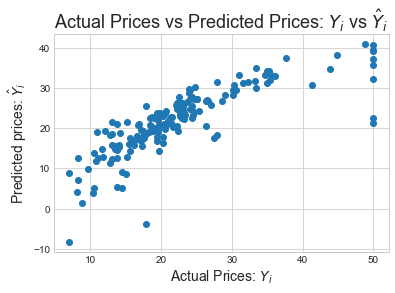

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Y_test,y_predictions)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

In [40]:
#finding mean square error
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_predictions)

31.907591630349387

# Implementing Sklearn SGD

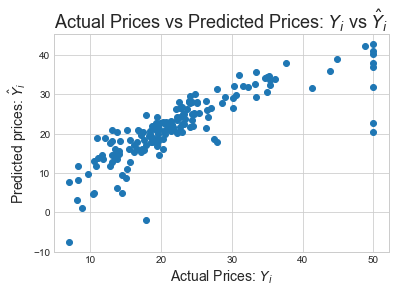

In [50]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(penalty='none', max_iter=5000, learning_rate='constant' , eta0=0.0002  )
sgd.fit(X_train_standard, Y_train)

sgd_predictions = sgd.predict(X_test_standard)



plt.scatter(Y_test, sgd_predictions)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

In [51]:
#finding mean square error
mean_squared_error(Y_test, sgd_predictions)

29.926801100225656

In [52]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["SGD-linear regression", "RMSE"]
x.add_row(["sklearn",29.926801100225656 ])
x.add_row(["manual sgd",31.907591630349387 ])
print(x)

+-----------------------+--------------------+
| SGD-linear regression |        RMSE        |
+-----------------------+--------------------+
|        sklearn        | 29.926801100225656 |
|       manual sgd      | 31.907591630349387 |
+-----------------------+--------------------+
